<a href="https://colab.research.google.com/github/Misery-1015/ML/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn
zhfont = matplotlib.font_manager.FontProperties(fname='SimHei .ttf')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/SimHei .ttf
100% 10.1M/10.1M [00:00<00:00, 124MB/s]


In [15]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
df.tail

<bound method NDFrame.tail of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
y=df.iloc[0:100,4].values
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [18]:
y=np.where(y=='Iris-setosa',-1,1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [19]:
x = df.iloc[0:100,[0,2]].values
print(x)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

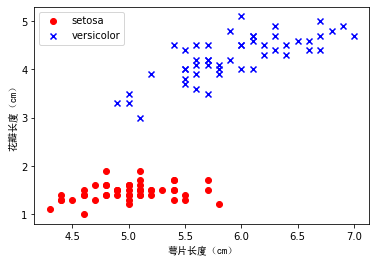

In [20]:
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False
plt.scatter(x[:50,0],x[:50,1],color='red',marker='o',label='setosa')
plt.scatter(x[50:100,0],x[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel(u'萼片长度（cm）',fontproperties=zhfont)
plt.ylabel(u'花瓣长度（cm）',fontproperties=zhfont)
plt.legend(loc='upper left')
plt.show()

In [21]:
class Perceptron():
  def __init__(self,eta=0.01,n_iter=50,random_state=1) -> None:
    self.eta=eta
    self.n_iter =n_iter
    self.random_state = random_state

  def net_input(self,x):
    # print(x)
    # print(self.w_[1:])
    # print(np.dot(x,self.w_[1:]) + self.w_[0])
    return np.dot(x,self.w_[1:]) + self.w_[0]

  def predict(self,x):
    return np.where(self.net_input(x) >= 0.0 ,1,-1)

  def fit(self,x,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_=rgen.normal(loc=0.0, scale=0.01,size=1+x.shape[1])
    self.errors_ = []
    for i in range(self.n_iter):
      errors = 0
      for xi, target in zip(x,y):
        # print(xi)
        update = self.eta * (target - self.predict(xi))
        self.w_[1:]+=update*xi
        self.w_[0]+=update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

In [22]:
rgen = np.random.RandomState(1)
w_=rgen.normal(loc=0.0, scale=0.01,size=1+x.shape[1])
print(w_[1:])

[-0.00611756 -0.00528172]


In [23]:
ppn=Perceptron(eta=0.1,n_iter=10)
ppn.fit(x,y)

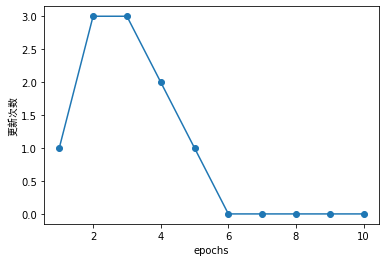

In [24]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('epochs')
plt.ylabel(u'更新次数',fontproperties=zhfont)
plt.show()

In [25]:
ppn.w_

array([-0.38375655, -0.70611756,  1.83471828])

In [47]:
from matplotlib.colors import ListedColormap

def plot_decision_region(x,y,classifier,resolution=0.02):
  markers = ('s','x','o','^','v')
  colors =('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = x[:,0].min()-1,x[:,0].max()-1
  x2_min, x2_max = x[:,1].min()-1,x[:,1].max()-1

  xx1,xx2 = np.meshgrid(
      np.arange(x1_min,x1_max+3,resolution),
      np.arange(x2_min,x2_max+3,resolution)
  )

  z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  z=z.reshape(xx1.shape)

  plt.contourf(xx1,xx2,z,alpha=0.3,cmap=cmap)
  # plt.xlim(xx1.min()-1,xx1.max()+5)
  # plt.ylim(xx2.min()-1,xx2.max()+5)
  x0=x
  for idx , cl in enumerate(np.unique(y)):
    plt.scatter(
        x=x0[y==cl,0],
        y=x0[y==cl,1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black'

    )

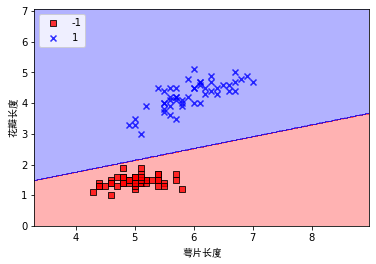

In [48]:
plot_decision_region(x,y,classifier=ppn)
plt.xlabel(u'萼片长度',fontproperties=zhfont)
plt.ylabel(u'花瓣长度',fontproperties=zhfont)
plt.legend(loc='upper left')
plt.show()